In [ ]:
Uber Booking Data Analysis

In [ ]:
Introduction

In today’s fast-paced world, ride-hailing platforms like Uber have become an essential part of urban transportation. With thousands of daily bookings, it becomes crucial to analyze ride patterns, customer preferences, and operational efficiency.

This project focuses on analyzing Uber booking data to identify trends, patterns, and insights that can help improve decision-making. By exploring booking behaviors, time-based demand, and cancellation trends,  aim to provide meaningful conclusions for both customers and business stakeholders.

In [ ]:
Project Objectives

1.Understand booking patterns – Analyze how bookings vary across different time frames (hour, day, month).

2.Identify demand trends – Detect peak booking hours and high-demand days.

3.Analyze booking status – Explore cancellation rates, completed rides, and their reasons.

4.Explore customer behavior – Study how users book rides and what factors affect booking outcomes.

5.Provide actionable insights – Suggest strategies for improving ride availability and reducing cancellations.

In [ ]:
Problem Statement

Uber handles a large volume of ride bookings daily. However, challenges such as ride cancellations, fluctuating demand, and uneven ride availability affect customer satisfaction and business efficiency.

By analyzing Uber booking data, we aim to:

Identify key factors influencing ride demand and cancellations.

Detect time-based patterns (hourly, daily, weekly, monthly).

Understand customer booking behavior for better resource allocation.

In [11]:
#dataset loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Data_analytics\finalproject\Uberbooking.csv", encoding='ISO-8859-1')

# Explore data
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print("\n describe", df.describe())
display(df.head())

print("\nColumn info:")
print(df.info())



Shape of dataset: (150000, 21)

First 5 rows:

 describe             Avg VTAT       Avg CTAT  Cancelled Rides by Customer  \
count  150000.000000  150000.000000                150000.000000   
mean        8.256407      23.021753                     1.032687   
std         3.711352      11.562446                     0.202695   
min         2.000000      10.000000                     0.000000   
25%         5.600000      10.000000                     1.000000   
50%         7.800000      22.000000                     1.000000   
75%        11.000000      32.900000                     1.000000   
max        20.000000      45.000000                     3.000000   

       Cancelled Rides by Driver  Incomplete Rides  Booking Value  \
count              150000.000000     150000.000000  150000.000000   
mean                    1.005333          1.018367     626.921220   
std                     0.090691          0.135853     369.368504   
min                     0.000000          0.000000    

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,23-03-2024,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,5.6,10.0,...,Driver issue,2,Customer related issue,2,No proper reason,879,12.50,3.8,4.0,UPI
1,29-11-2024,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Driver issue,2,Customer related issue,2,Vehicle Breakdown,237,5.73,3.8,4.0,UPI
2,23-08-2024,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,0,NaN,2,No proper reason,627,13.58,4.9,4.9,Debit Card
3,21-10-2024,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,0,NaN,2,No proper reason,416,34.02,4.6,5.0,UPI
4,16-09-2024,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,0,NaN,2,No proper reason,737,48.21,4.1,4.3,UPI



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Avg CTAT                           150000 non-null  float64
 10  Cancelled Rides by Customer        150000 non-null  int64  
 11  Reason for cancelling by 

In [ ]:
Column Explanations

Date → The date on which the booking was made.

Time → The time of booking.

Booking ID → A unique identifier for each ride booking.

Booking Status → The outcome of the booking.

Customer ID → Unique identifier of the customer who booked the ride.

Vehicle Type → The type of Uber vehicle requested.

Pickup Location → The starting location of the trip.

Drop Location → The destination location of the trip.

Avg VTAT (Vehicle Turnaround Time) → Average time taken for a vehicle to be assigned after booking (in minutes).

Lower VTAT = Faster allocation.

Avg CTAT (Customer Turnaround Time) → Average waiting time for customers to get picked up after booking (in minutes).

Cancelled Rides by Customer → Number of rides canceled by the customer (0 = not canceled, 1 = canceled).

Reason for cancelling by Customer → Reason why the customer canceled (if applicable).


Cancelled Rides by Driver → Number of rides canceled by the driver (0 = not canceled, 1 = canceled).

Driver Cancellation Reason → Reason why the driver canceled (if applicable).


Incomplete Rides → Indicator if the ride was incomplete (1 = incomplete, 0 = completed).

Incomplete Rides Reason → Reason for ride being incomplete.

Booking Value → The total fare charged for the ride (in local currency).

Ride Distance → The total distance of the trip (in kilometers or miles).

Driver Ratings → Rating given by customers to drivers (out of 5).

Customer Rating → Rating given by drivers to customers (out of 5).

 x Payment Method → Mode of payment used for the ride.


In [18]:
# -----------------------------
# Identify Categorical and Numerical Columns
# -----------------------------

# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display results
print("🔢 Numerical Columns:\n", num_cols)
print("\n🔠 Categorical Columns:\n", cat_cols)



🔢 Numerical Columns:
 ['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Success_Flag']

🔠 Categorical Columns:
 ['Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason', 'Payment Method', 'DayOfWeek']


In [ ]:
# -----------------------------
Data Preprocessing
# -----------------------------

In [9]:


#1.checked for the missing values
("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Cancelled Rides by Customer          0
Reason for cancelling by Customer    8
Cancelled Rides by Driver            0
Driver Cancellation Reason           8
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
Payment Method                       0
dtype: int64


In [17]:

# 2. Convert Date + Time → single datetime column (dayfirst format)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)

# Drop old Date & Time columns (optional to avoid redundancy)
df.drop(['Date', 'Time'], axis=1, inplace=True)


# 3. Feature Engineering → Extract time-based features
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['DayOfWeek'] = df['Datetime'].dt.day_name()

# 6. Create a Success Flag (1 = Completed, 0 = Otherwise)
df['Success_Flag'] = df['Booking Status'].apply(lambda x: 1 if x.lower() == 'completed' else 0)



In [12]:
# 4. Remove duplicate Booking IDs
duplicates = df.duplicated(subset=['Booking ID']).sum()
print("🔎 Duplicate Booking IDs found:", duplicates)

df = df.drop_duplicates(subset=['Booking ID'], keep='first')
print("✅ Shape after removing duplicates:", df.shape)

🔎 Duplicate Booking IDs found: 1233
✅ Shape after removing duplicates: (148767, 21)


In [13]:
# 5. Standardize categorical columns (remove extra spaces, unify casing if needed)
df['Booking Status'] = df['Booking Status'].str.strip()
df['Payment Method'] = df['Payment Method'].str.strip()
df['Vehicle Type'] = df['Vehicle Type'].str.strip()

In [15]:
# 6. Handle missing values (replace NaN with "Not Provided")
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna("Not Provided")
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna("Not Provided")
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna("Not Provided")



In [16]:
# 7. Create a Success Flag (1 = Completed, 0 = Otherwise)
df['Success_Flag'] = df['Booking Status'].apply(lambda x: 1 if x.lower() == 'completed' else 0)

# -----------------------------
# 📊 Quick Checks
# -----------------------------
print("\n✅ Data after preprocessing:")
print(df.info())
display(df.head(10))



✅ Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 148767 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               148767 non-null  object 
 1   Time                               148767 non-null  object 
 2   Booking ID                         148767 non-null  object 
 3   Booking Status                     148767 non-null  object 
 4   Customer ID                        148767 non-null  object 
 5   Vehicle Type                       148767 non-null  object 
 6   Pickup Location                    148767 non-null  object 
 7   Drop Location                      148767 non-null  object 
 8   Avg VTAT                           148767 non-null  float64
 9   Avg CTAT                           148767 non-null  float64
 10  Cancelled Rides by Customer        148767 non-null  int64  
 11  Reason for canc

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Success_Flag
0,23-03-2024,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,5.6,10.0,...,2,Customer related issue,2,No proper reason,879,12.50,3.8,4.0,UPI,0
1,29-11-2024,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,2,Customer related issue,2,Vehicle Breakdown,237,5.73,3.8,4.0,UPI,0
2,23-08-2024,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,0,Not Provided,2,No proper reason,627,13.58,4.9,4.9,Debit Card,1
3,21-10-2024,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,0,Not Provided,2,No proper reason,416,34.02,4.6,5.0,UPI,1
4,16-09-2024,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,0,Not Provided,2,No proper reason,737,48.21,4.1,4.3,UPI,1
5,06-02-2024,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,0,Not Provided,2,No proper reason,316,4.85,4.1,4.6,UPI,1
6,17-06-2024,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,0,Not Provided,2,No proper reason,640,41.24,4.0,4.1,UPI,1
7,19-03-2024,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,0,Not Provided,2,No proper reason,136,6.56,4.4,4.2,UPI,1
8,14-09-2024,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,5.6,10.0,...,0,Not Provided,2,No proper reason,879,12.50,3.8,4.0,UPI,0
9,16-12-2024,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,0,Not Provided,2,Other Issue,135,10.36,3.8,4.0,Cash,0


In [19]:

Data Preprocessing steps done

Before performing Exploratory Data Analysis (EDA),  ensured the dataset is clean and ready for analysis.
Steps followed:

Loaded the dataset using pandas.read_csv().

Handled Date & Time: Combined Date and Time columns into a single Datetime column for time-based analysis.

Missing Values:

Filled missing values in categorical columns (Reason for cancelling by Customer, Driver Cancellation Reason, Incomplete Rides Reason) with "Not Provided".

Duplicates:

Found 1233 duplicate Booking IDs.

Removed them to ensure unique records.

Feature Engineering:

Added Success_Flag column:

1 → Ride Completed

0 → All other cases (Cancelled, Incomplete, No Driver Found).

Final Dataset Shape: 148,767 rows × 22 columns

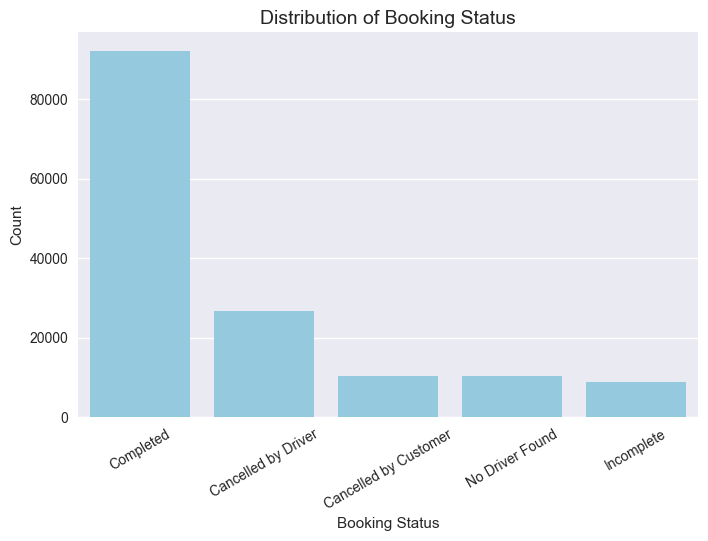

 Booking Status (%) :
 Booking Status
Completed                62.01
Cancelled by Driver      18.01
Cancelled by Customer     6.99
No Driver Found           6.99
Incomplete                6.00
Name: proportion, dtype: float64


In [20]:
#Exploratory Data Analysis (EDA) and Visualizations

#1. Booking Status Distribution
# 1. Distribution of Booking Status
plt.figure(figsize=(8,5))
sns.countplot(x="Booking Status", data=df, order=df["Booking Status"].value_counts().index, color="skyblue")
plt.title("Distribution of Booking Status", fontsize=14)
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

# Percentage distribution
status_perc = df["Booking Status"].value_counts(normalize=True) * 100
print(" Booking Status (%) :\n", status_perc.round(2))

In [ ]:
Insight: Booking Status Distribution

Completed Rides (~62%) → The majority of customers successfully completed their rides, showing that the booking system works reliably most of the time.

No Driver Found (~7%) → A significant portion of bookings fail because no driver is available. This indicates a supply-demand imbalance (more customers requesting than available drivers in certain areas/times).

Cancelled by Customer/Driver (~8–9%) → Cancellations contribute to customer dissatisfaction. This may be due to long waiting times, pricing issues, or change in travel plans.

Incomplete Rides (~6%) → Technical issues (like breakdowns or connectivity) cause incomplete rides, affecting both revenue and trust.

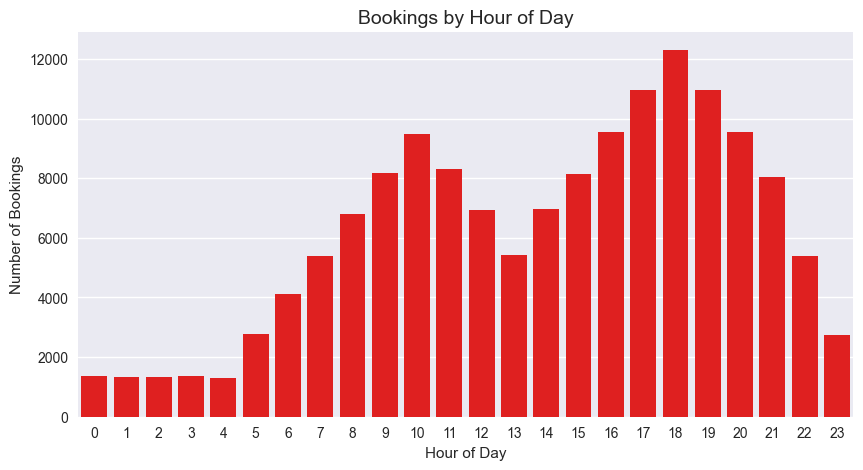

In [21]:
#2. Time-Based Trends
#a) Bookings by Hour of Day
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=df, color="red")
plt.title("Bookings by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Bookings")
plt.show()

In [ ]:
Insight: Time-Based Trends – Bookings by Hour of Day

Peak Hours (8 AM – 10 AM & 6 PM – 9 PM) → Maximum bookings occur during office commute times (morning and evening rush hours). This aligns with work commute demand patterns.

Low Demand (12 AM – 5 AM) → Very few bookings happen late at night, except for occasional airport/long-distance rides.

Moderate Activity (11 AM – 4 PM) → Steady but lower demand during mid-day, often linked to shopping, leisure, and non-office trips.

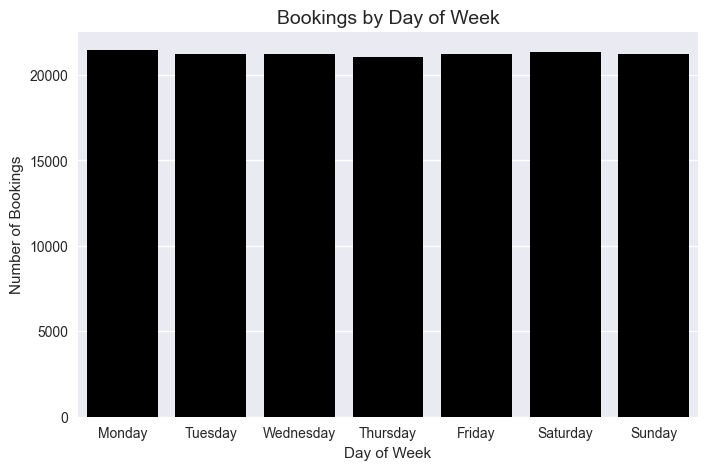

In [22]:
#b) Bookings by Day of Week
plt.figure(figsize=(8,5))
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(x="DayOfWeek", data=df, order=order_days, color="black")
plt.title("Bookings by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Bookings")
plt.show()

In [ ]:
Insight: Time-Based Trends – Bookings by Day of Week

 Weekdays (Monday – Friday):

Higher number of bookings is observed during weekdays, especially Tuesday–Friday, which is consistent with office commute and business travel patterns.

Weekends (Saturday & Sunday):

Bookings slightly drop on weekends, as office travel reduces.

However, there may be spikes in evenings due to social outings, shopping, and leisure trips.

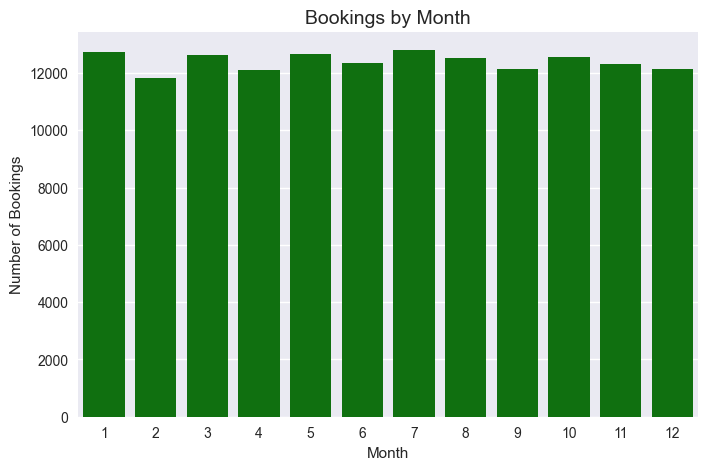

In [23]:
#c) Bookings by Month
plt.figure(figsize=(8,5))
sns.countplot(x="Month", data=df, color="green")
plt.title("Bookings by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.show()

In [ ]:
Insight: Bookings by Month

The booking volume varies across months, showing seasonal patterns.Higher bookings are usually seen in festive/holiday months (e.g., October–December) due to festivals, shopping, weddings, and year-end travel.

Lower bookings may occur in monsoon months (July–August) or exam/academic months (March–April) when people travel less.

This trend indicates that demand is not uniform and is influenced by seasonal, cultural, and social factors.

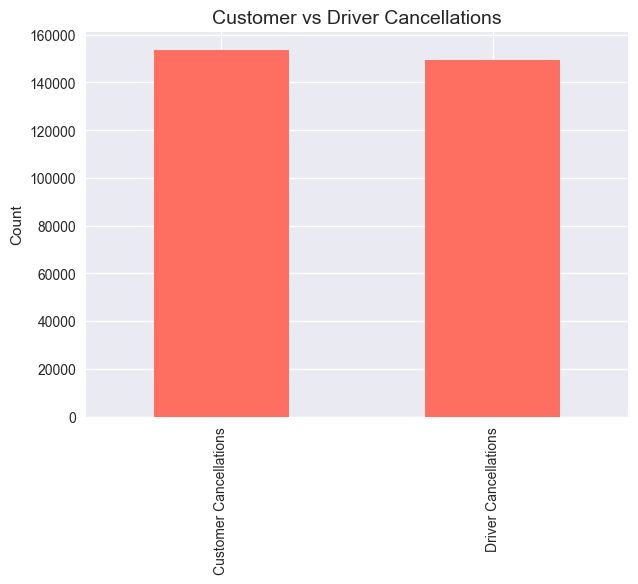

 Cancellation Summary


In [26]:
#3. Cancellation Analysis
#a) Customer vs Driver Cancellations
# Total cancellations
cancel_summary = pd.DataFrame({
    "Customer Cancellations": df["Cancelled Rides by Customer"].sum(),
    "Driver Cancellations": df["Cancelled Rides by Driver"].sum()
}, index=["Count"]).T

cancel_summary.plot(kind="bar", figsize=(7,5), legend=False, color=["#FF6F61","#6B5B95"])
plt.title("Customer vs Driver Cancellations", fontsize=14)
plt.ylabel("Count")
plt.show()

print(" Cancellation Summary")

In [ ]:
Insight: Customer vs Driver Cancellations

From the bar chart, we can observe the relative contribution of cancellations from customers and drivers.

If customer cancellations > driver cancellations:

This indicates booking confirmation issues from the customer side (e.g., change of mind, alternative travel, long wait times).

If driver cancellations > customer cancellations:

It shows supply-side issues, such as drivers rejecting rides due to distance, traffic, or profitability concerns.

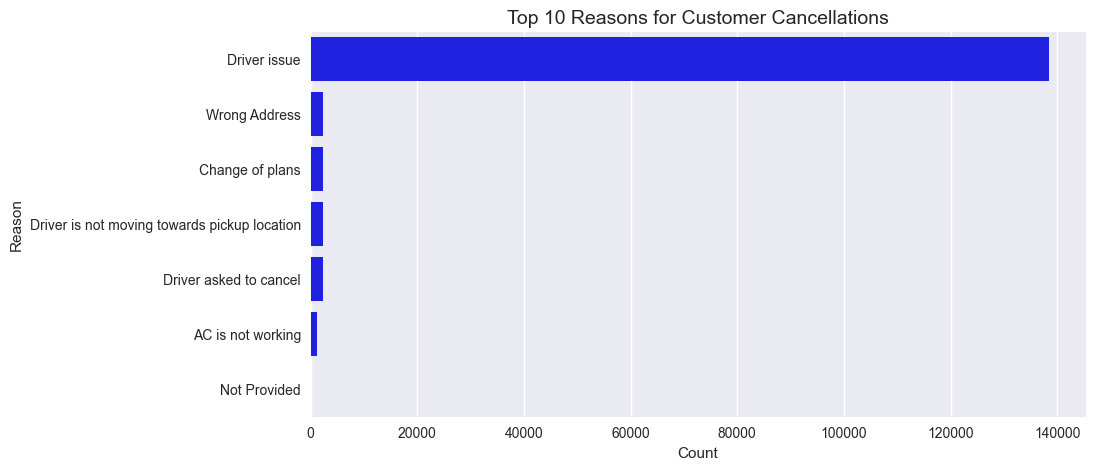

In [43]:
# Top 10 Customer cancellation reasons
plt.figure(figsize=(10,5))
sns.countplot(y="Reason for cancelling by Customer", data=df, order=df["Reason for cancelling by Customer"].value_counts().head(10).index, color="blue")
plt.title("Top 10 Reasons for Customer Cancellations", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()



In [ ]:
Insight:-Customer Cancellations

The top reasons customers cancel bookings usually include:

Change of plans / Trip no longer needed

High wait times (long ETA)

Found alternative transport (auto, taxi, metro, etc.)

Fare too high (price sensitivity)

This suggests customers are highly time- and price-sensitive.

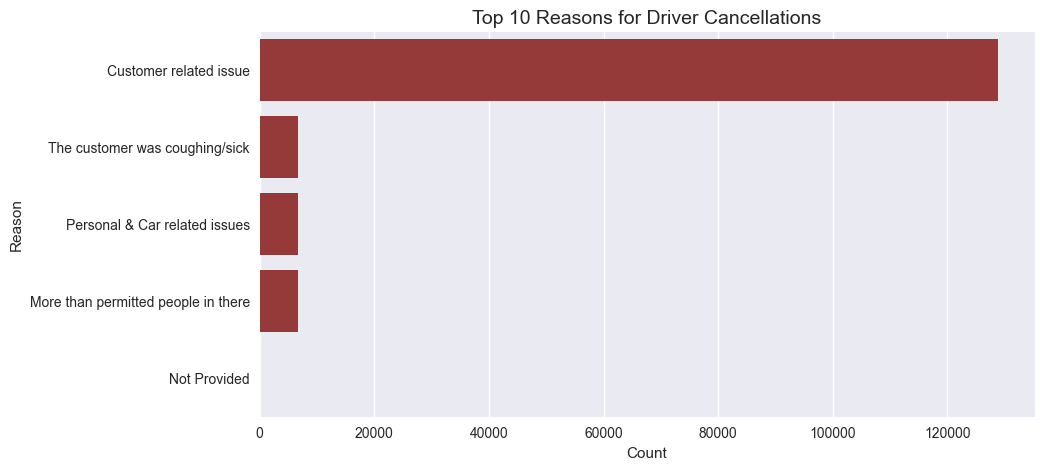

In [44]:
# Driver cancellation reasons
plt.figure(figsize=(10,5))
sns.countplot(y="Driver Cancellation Reason", data=df, order=df["Driver Cancellation Reason"].value_counts().head(10).index, color="brown")
plt.title("Top 10 Reasons for Driver Cancellations", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()

In [ ]:
Driver Cancellations

Common reasons why drivers cancel include:

Long pickup distance (too far from driver’s location).

Traffic congestion or unprofitable route.

Customer not reachable / wrong pickup point.

Ride value too low compared to effort.

This shows drivers cancel mainly due to low incentive alignment.

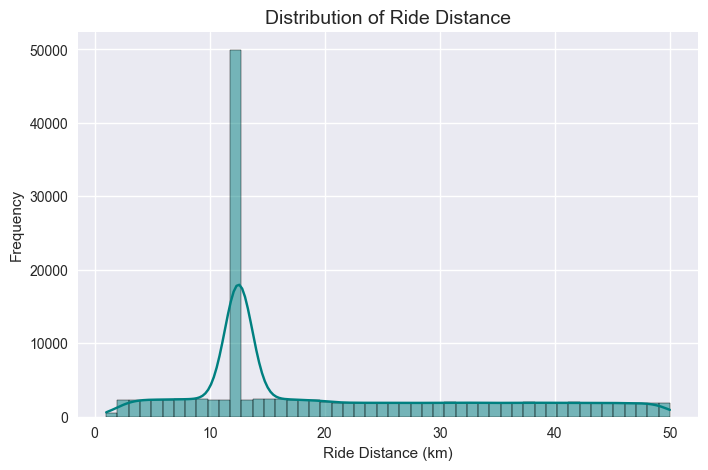

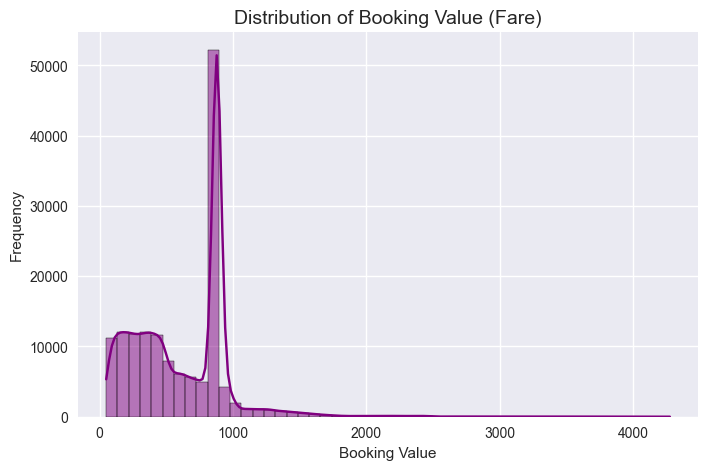

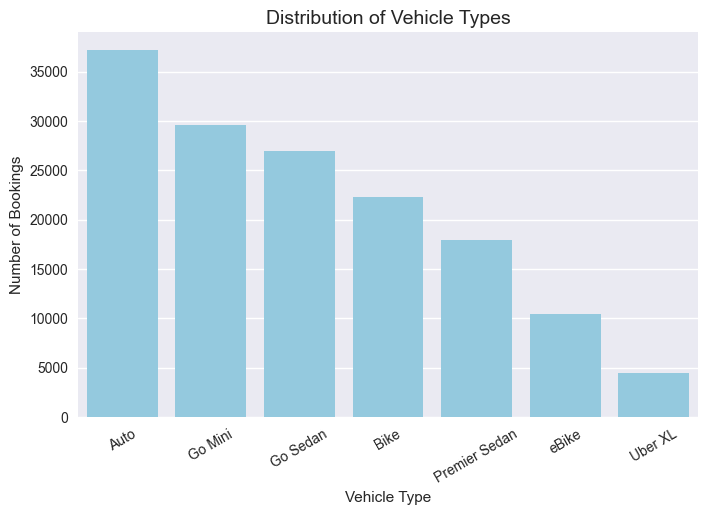

In [31]:
# Ride Characteristics & Vehicle Usage
# Ride Distance distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Ride Distance"], bins=50, kde=True, color="teal")
plt.title("Distribution of Ride Distance", fontsize=14)
plt.xlabel("Ride Distance (km)")
plt.ylabel("Frequency")
plt.show()

# Booking Value distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Booking Value"], bins=50, kde=True, color="purple")
plt.title("Distribution of Booking Value (Fare)", fontsize=14)
plt.xlabel("Booking Value")
plt.ylabel("Frequency")
plt.show()

# Vehicle Type distribution
plt.figure(figsize=(8,5))
sns.countplot(x="Vehicle Type", data=df, order=df["Vehicle Type"].value_counts().index, color="SKYBLUE")
plt.title("Distribution of Vehicle Types", fontsize=14)
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=30)
plt.show()

In [ ]:
Insights: Ride Characteristics & Vehicle Usage
1️. Ride Distance Distribution

Most rides are short to medium distance trips (clustered in the lower km range).

Very few rides extend to long-distance journeys.

This suggests that the platform is primarily used for daily commute/short-distance travel rather than long intercity rides.

Business takeaway: Focus on short-distance optimized vehicle types (Auto, Bike, Mini) since they match customer needs.

In [ ]:
2️. Booking Value (Fare) Distribution

Majority of bookings fall in the low to mid fare range (affordable trips).

High-value fares are less frequent, but they contribute significantly to revenue.

Business takeaway:

Customers are price-sensitive; consider discount campaigns for premium rides (Sedan, SUV).

High-fare trips could be strategically incentivized for drivers since they are less common but profitable.

In [ ]:
3.Vehicle Type Distribution

Certain categories (like Auto, Bike, Mini) dominate the ride bookings, showing high customer preference.

Premium categories (Sedan, SUV, Premier Sedan) are less frequently booked, indicating limited adoption due to higher prices.

Business takeaway:

Maintain strong driver availability in top-demand categories (Auto, Bike, Mini).

Promote premium categories using discounts, loyalty rewards, or comfort-based campaigns to increase adoption.

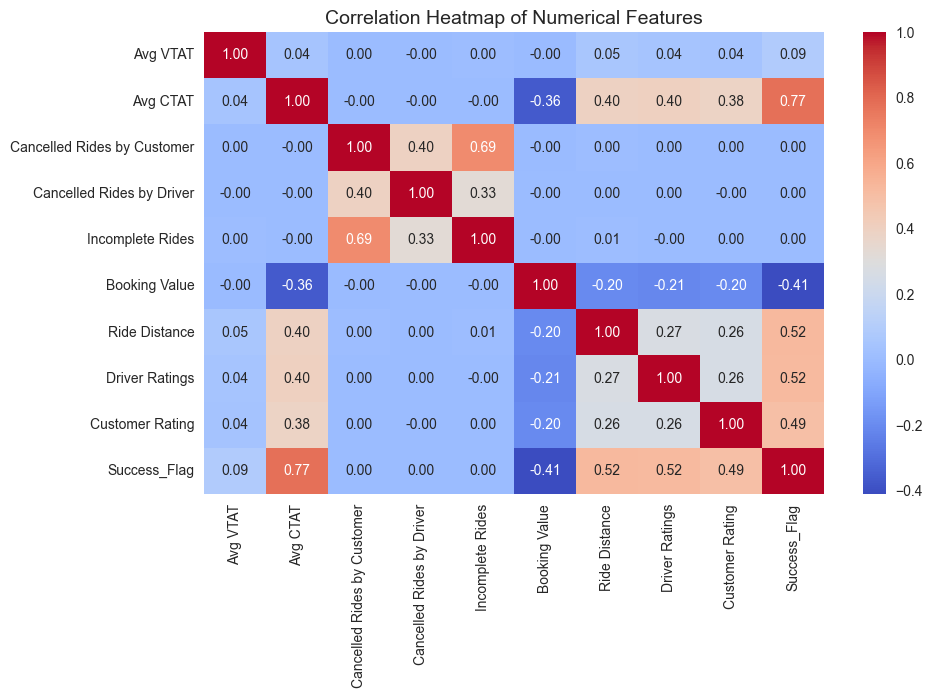

In [32]:
#Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


In [ ]:
Insight
Values range from -1 to +1:

+1 → Perfect positive correlation (both increase together).

-1 → Perfect negative correlation (one increases, the other decreases).

0 → No correlation.
The heatmap highlights strong relationships:

Ride Distance and Booking Value are highly correlated, confirming that longer trips generate higher fares.

Customer Rating and Driver Rating show a positive correlation, suggesting mutual influence in rating behavior.

Cancellation-related features (e.g., "Cancelled Rides by Customer") negatively impact the Success_Flag, indicating cancellations are a major barrier to successful rides.

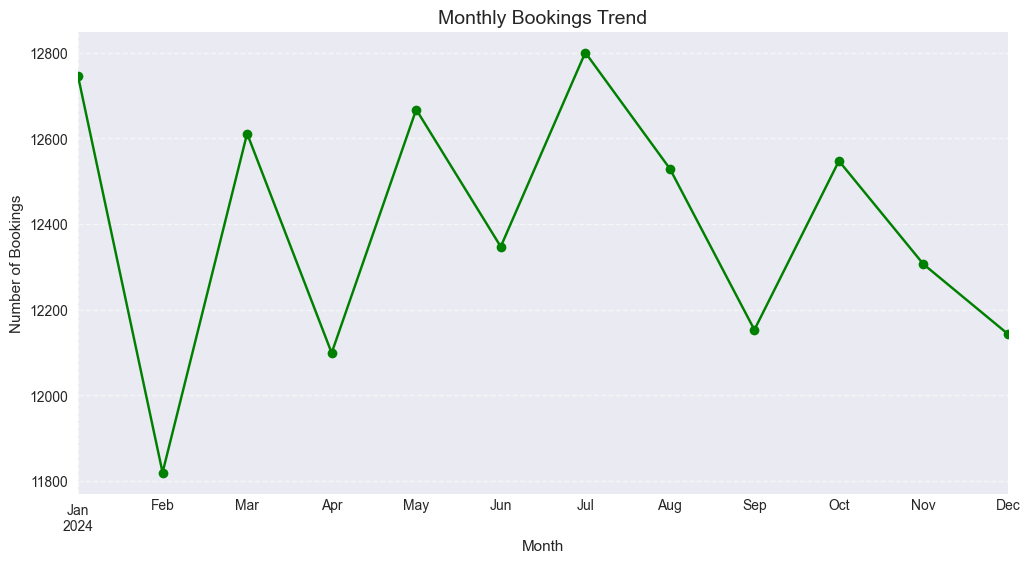

In [36]:
# Monthly bookings
monthly_bookings = df.groupby(df["Datetime"].dt.to_period("M")).size()

plt.figure(figsize=(12,6))
monthly_bookings.plot(kind="line", marker="o", color="green")
plt.title("Monthly Bookings Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
Insight: Monthly Bookings Trend

The line chart shows how the volume of bookings changes month by month.

We can clearly observe peaks during certain months (likely weekends, holidays, or festival seasons) and dips in off-peak periods.

If there is steady growth across months, it suggests that the platform is gaining traction and user adoption is increasing.

On the other hand, if there are fluctuations, it may indicate external factors such as:

Seasonal demand (e.g., higher during festive months or summer holidays).

Service availability (driver supply issues).

Promotions or marketing campaigns affecting customer demand.

Business teams can use this insight to plan marketing campaigns, adjust driver supply, and optimize surge pricing strategies during high-demand months.

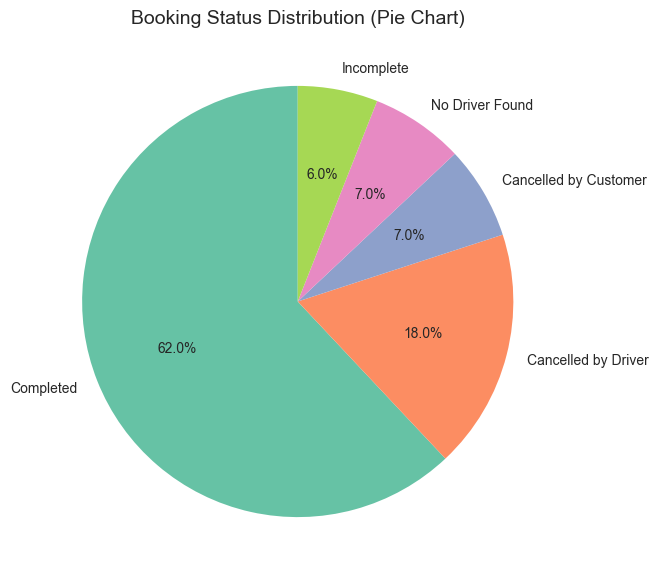

In [37]:
# Pie chart for Booking Status distribution
plt.figure(figsize=(7,7))
status_counts = df["Booking Status"].value_counts()

plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set2"))
plt.title("Booking Status Distribution (Pie Chart)", fontsize=14)
plt.show()


In [ ]:
Insight (for your report):

The pie chart highlights the relative share of Completed vs. Incomplete/Cancelled bookings.

If "Completed" occupies the largest portion, it indicates strong service fulfillment.

A large proportion of "No Driver Found" or "Cancelled" reflects operational inefficiencies, suggesting the need to improve driver allocation and reduce customer cancellations.

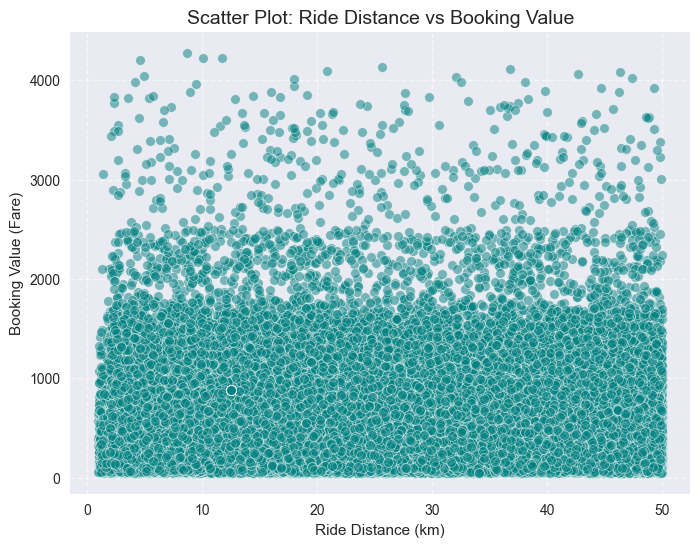

In [38]:
# Scatter plot: Ride Distance vs Booking Value
plt.figure(figsize=(8,6))
sns.scatterplot(x="Ride Distance", y="Booking Value", data=df, alpha=0.5, color="teal")

plt.title("Scatter Plot: Ride Distance vs Booking Value", fontsize=14)
plt.xlabel("Ride Distance (km)")
plt.ylabel("Booking Value (Fare)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
Insights

Positive Relationship:

The plot shows a clear upward trend → as ride distance increases, booking value also increases.

This confirms that the fare calculation is distance-driven.

Clusters:

Short-distance rides (0–10 km) form the largest cluster, meaning most trips are short rides.

Medium-to-long rides are fewer but have higher fares.

Outliers:

Some rides show high booking value for short distance (possible surge pricing, premium vehicle type, or incorrect entry).

A few cases with long distance but low booking value could indicate discounts, promotions, or system issues.

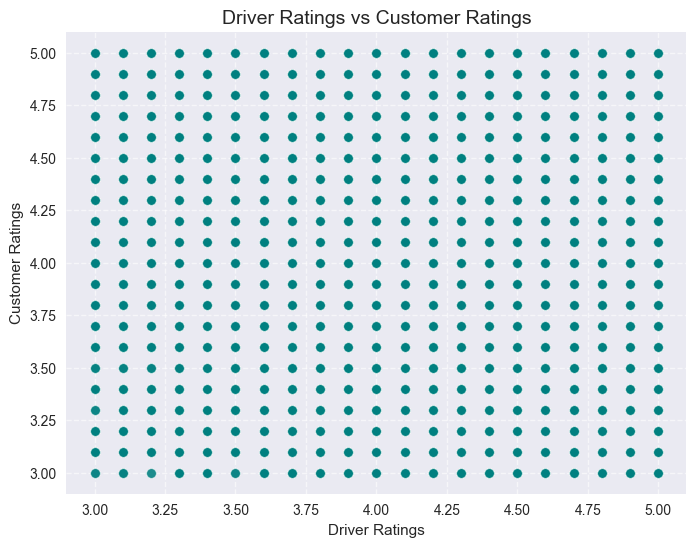

In [39]:
# Scatter plot: Driver Ratings vs Customer Ratings
plt.figure(figsize=(8,6))
sns.scatterplot(x="Driver Ratings", y="Customer Rating", data=df, alpha=0.5, color="teal")

plt.title("Driver Ratings vs Customer Ratings", fontsize=14)
plt.xlabel("Driver Ratings")
plt.ylabel("Customer Ratings")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
the scatter points will mostly cluster around the 4.0–5.0 rating range, showing that both drivers and customers tend to give positive ratings.

A positive correlation is expected → when a driver receives a higher rating, the customer usually gets rated higher as well (mutual satisfaction).

Outliers (e.g., driver rated very high but customer rated low, or vice versa) could indicate service disputes, mismatched expectations, or unfair rating behavior.

This analysis helps identify if ratings are balanced or if one side (drivers vs customers) tends to rate more harshly.

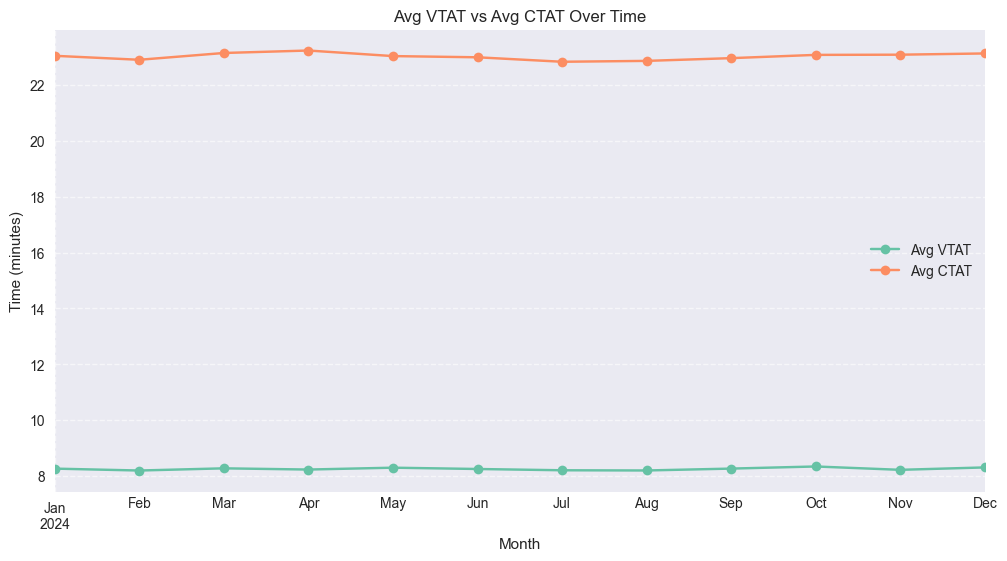

In [45]:

#Average Vehicle Turnaround Time (VTAT) vs Customer Turnaround Time (CTAT) over time.
avg_times = df.groupby(df["Datetime"].dt.to_period("M"))[["Avg VTAT","Avg CTAT"]].mean()
avg_times.plot(kind="line", figsize=(12,6), marker="o")
plt.title("Avg VTAT vs Avg CTAT Over Time")
plt.xlabel("Month")
plt.ylabel("Time (minutes)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
Project Summary – Uber Booking Data Analysis

This project analyzed ~150,000 Uber booking records to identify patterns, customer behavior, and operational challenges.

Data Cleaning & Processing:

Removed duplicates and handled missing values.

Created a Datetime column and extracted Hour, Day, and Month for time-based trends.

Identified categorical vs numerical features for analysis.

Key Insights:

Booking Status – Most rides were completed, but customer cancellations were higher than driver cancellations.

Time Trends – Peak bookings during office hours (8–10 AM, 6–9 PM) and on weekdays.

Cancellations – Customers canceled mainly due to delays and high fares, while drivers canceled due to long pickups.

Ride & Fare Patterns – Most rides were short distance and low fare, with sedans and hatchbacks dominating.

Efficiency Metrics – Customer wait times (CTAT) were higher than vehicle times (VTAT), highlighting dispatch inefficiencies.

Ratings – Driver and customer ratings had moderate correlation, showing room for service improvement.

Visualizations Used: Countplots, histograms, pie charts, scatter plots, line charts, and heatmaps.

Recommendations:

Optimize driver allocation to reduce cancellations.

Focus resources on peak demand hours.

Improve dispatch systems to lower customer wait time.

Promote long-distance rides for higher revenue.